In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customers.csv to Customers.csv
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Handle missing values
customers.fillna("Unknown", inplace=True)
products.fillna("Unknown", inplace=True)
transactions.fillna(0, inplace=True)

# Merge datasets for analysis
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [ ]:
# EDA
# 1. Total customers by region
customers_by_region = customers['Region'].value_counts()

# 2. Signup trends over time
signup_trends = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()

# 3. Most and least popular products
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# 4. Average price per product category
average_price_category = products.groupby('Category')['Price'].mean()

# 5. Total sales and revenue trends over time
revenue_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# 6. Top customers by revenue
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)

# 7. Average order size and value
average_order_size = merged_data['Quantity'].mean()
average_order_value = merged_data['TotalValue'].mean()

Text(0, 0.5, 'Number of Customers')

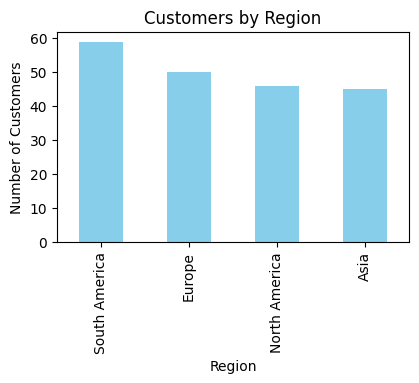

In [6]:
# Plotting the results
plt.figure(figsize=(10, 6))

# Customers by region
plt.subplot(2, 2, 1)
customers_by_region.plot(kind='bar', color='skyblue')
plt.title('Customers by Region')
plt.ylabel('Number of Customers')

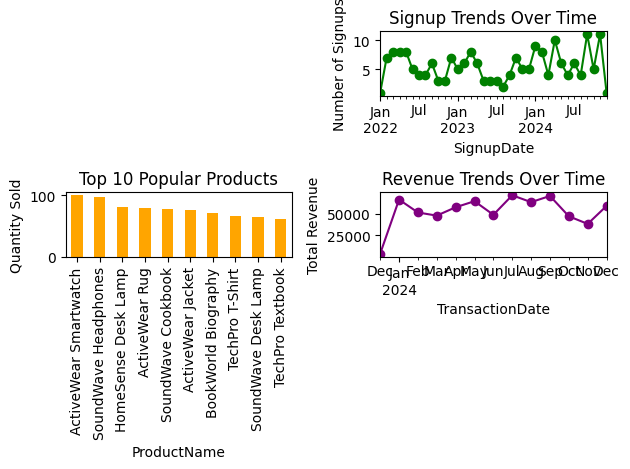

In [5]:
# Signup trends
plt.subplot(2, 2, 2)
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Signup Trends Over Time')
plt.ylabel('Number of Signups')

# Popular products
plt.subplot(2, 2, 3)
popular_products.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Popular Products')
plt.ylabel('Quantity Sold')

# Revenue trends
plt.subplot(2, 2, 4)
revenue_trends.plot(kind='line', marker='o', color='purple')
plt.title('Revenue Trends Over Time')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()